### GIỚI THIỆU BÀI TOÁN VÀ TẬP DỮ LIỆU
Trong bài toán này, chúng ta đi đánh giá hiệu năng và khả năng dự đoán của một mô hình học máy đơn giản trên tập dữ Dự đoán học sinh đi học đại học .\
<br>
Dữ Liệu này nhằm dự đoán liệu sinh viên sẽ tiếp tục đi học đại học hay không. Bằng cách trợ giúp của Học máy, các cố vấn của trường học có thể giúp học sinh không đi học đại học giải tìm các vấn đề và giúp đỡ họ 

### NHẬP THƯ VIỆN

In [21]:
import sklearn
import random
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import xlsxwriter

### ĐỌC DỮ LIỆU
Sử dụng thư viên pandas để đọc dữ liệu đầu vào. Tập dữ liệu gồm 11 đặc trưng trong đó:
```
- Type_school: Loại trường mà học sinh theo học. Gồm 2 giá trị là Academic và Vocational.
- School_accreditation: Chất lượng của trường, A tốt hơn B. Gồm 2 giá trị là A và B.
- Gender: Giới tính của sinh viên. Gồm 2 giá trị là Male và Female.
- Interest: Mức độ quan tâm của học sinh nếu họ vào đại học. Gồm các giá trị Very Interested, Interested, Uncertain, Less Interested, Quiet Interested, Not Interested.
- Resident: Nơi cư chú. Gồm 2 giá trị Urban và Rural.
- Parent_age: Tuổi của bố mẹ nằm trong giải từ 40-60 tuổi.
- Parent_salary: Thu nhập trung bình của bố mẹ mỗi tháng tính bằng IDR/Rupiah. Từ 100K-10M.
- House_area: Diện tích nhà tính bằng mét vuông, từ 20-120m2.
- Average_grades: Điểm trung bình, từ 0-100.
- Parent_was_in_college: Bố mẹ đã đi học đại học. Gồm các giá trị true và false.
- Will_go_to_college: Học sinh đó có đi học đại học hay không. 
```

In [22]:
dataset = pd.read_csv('E:/Tài liệu đại học/Tri tue nhan tao va ung dung/AI Project/dataset/Go_To_College_Dataset.csv')
dataset

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


### Kiểm tra dữ liệu có sạch không, có giá trị null không.

In [23]:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


### Thống kê các thông tin cơ bản của mỗi đặc trưng.

In [24]:
dataset.describe()

,parent_age,parent_salary,house_area,average_grades
count,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,52.208000,5.381570e+06,74.515300,86.097200
std,3.500427,1.397546e+06,15.293346,3.378738
min,40.000000,1.000000e+06,20.000000,75.000000
25%,50.000000,4.360000e+06,64.600000,83.737500
50%,52.000000,5.440000e+06,75.500000,85.575000
75%,54.000000,6.382500e+06,84.825000,88.262500
max,65.000000,1.000000e+07,120.000000,98.000000


### Lấy tên các đặc trưng

In [25]:
dataset.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'will_go_to_college'],
      dtype='object')

### Chuẩn hóa dữ liệu Và Map lại dữ liệu

In [26]:
dataset['type_school'] = dataset['type_school'].map({'Academic':0, 'Vocational':1})
dataset['school_accreditation'] = dataset['school_accreditation'].map({'A': 0,'B': 1})
dataset['gender'] = dataset['gender'].map({'Male': 0,'Female': 1})
dataset['interest'] = dataset['interest'].map({'Very Interested': 0, 'Interested':1, 'Uncertain': 2, 'Less Interested':3, 'Quiet Interested':4, 'Not Interested':5})
dataset['residence'] = dataset['residence'].map({'Urban':0,'Rural': 1})
dataset["parent_was_in_college"] = dataset["parent_was_in_college"].astype(int)
dataset["will_go_to_college"] = dataset["will_go_to_college"].astype(int)
dataset

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,0,3,0,56,6950000,83.0,84.09,0,1
1,0,0,0,3,0,57,4410000,76.8,86.91,0,1
2,0,1,1,0,0,50,6500000,80.6,87.43,0,1
3,1,1,0,0,1,49,6600000,78.2,82.12,1,1
4,0,0,1,0,0,57,5250000,75.1,86.79,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,0,1,49,7420000,63.6,85.99,1,1
996,0,1,1,3,1,51,7480000,84.3,89.72,1,1
997,1,0,0,3,0,49,5550000,75.2,79.56,0,1
998,0,1,0,2,1,53,5840000,105.8,87.18,1,1


### Kiểm tra lại có bị Map sai hay không

In [27]:
dataset.isnull().sum()/len(dataset)*100

type_school              0.0
school_accreditation     0.0
gender                   0.0
interest                 0.0
residence                0.0
parent_age               0.0
parent_salary            0.0
house_area               0.0
average_grades           0.0
parent_was_in_college    0.0
will_go_to_college       0.0
dtype: float64

# Vẽ ma trận tương quan để lọc bỏ bớt đặc trưng làm giảm độ phức tạp.


[]


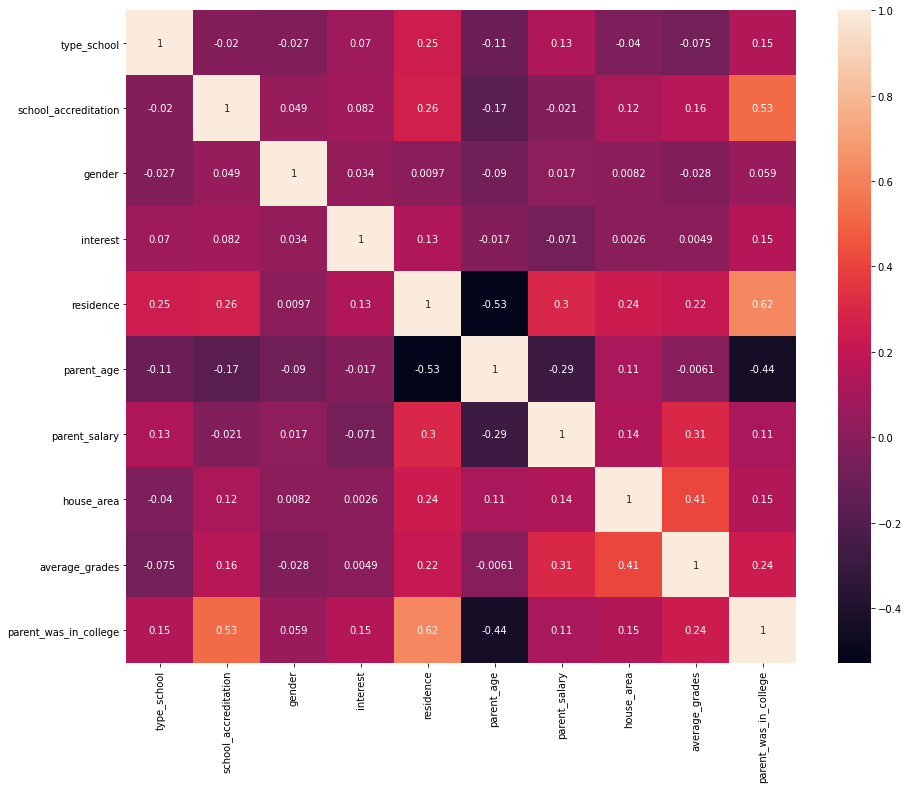

In [28]:
numeric = dataset.drop(['will_go_to_college'], axis=1)
correlation = numeric.corr()
numeric_columns = numeric.columns
high_corr = []

for c1 in numeric_columns:
    for c2 in numeric_columns:
        if c1 != c2 and c2 not in high_corr and correlation[c1][c2] > 0.73:
            high_corr.append(c1)
print(high_corr)

plt.figure(figsize=(15,12))
sn.heatmap(correlation, annot=True)
plt.show()

### TÁCH NHÃN DỮ LIỆU

In [29]:
X = dataset.drop(['will_go_to_college'], axis=1)
y = dataset['will_go_to_college']
print(X)
print(y)

     type_school  school_accreditation  gender  interest  residence  \
0              0                     0       0         3          0   
1              0                     0       0         3          0   
2              0                     1       1         0          0   
3              1                     1       0         0          1   
4              0                     0       1         0          0   
..           ...                   ...     ...       ...        ...   
995            1                     0       1         0          1   
996            0                     1       1         3          1   
997            1                     0       0         3          0   
998            0                     1       0         2          1   
999            0                     1       0         1          0   

     parent_age  parent_salary  house_area  average_grades  \
0            56        6950000        83.0           84.09   
1            57        

### CHIA DỮ LIỆU VỚI TỶ LỆ 4:1

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 10), (800,), (200, 10), (200,))

### VISUALIZE DỮ LIỆU, ĐÁNH GIÁ MỨC ĐỘ PHÂN TÁCH CỦA DỮ LIỆU BẰNG KINH NGHIỆM

In [31]:
tsne = TSNE(n_components=2)
z = tsne.fit_transform(X_train)
dfTSne = pd.DataFrame()
dfTSne['y'] =  y_train
dfTSne["comp-1"] = z[:,0]
dfTSne["comp-2"] = z[:,1]


[Text(0.5, 1.0, 'Going to College')]

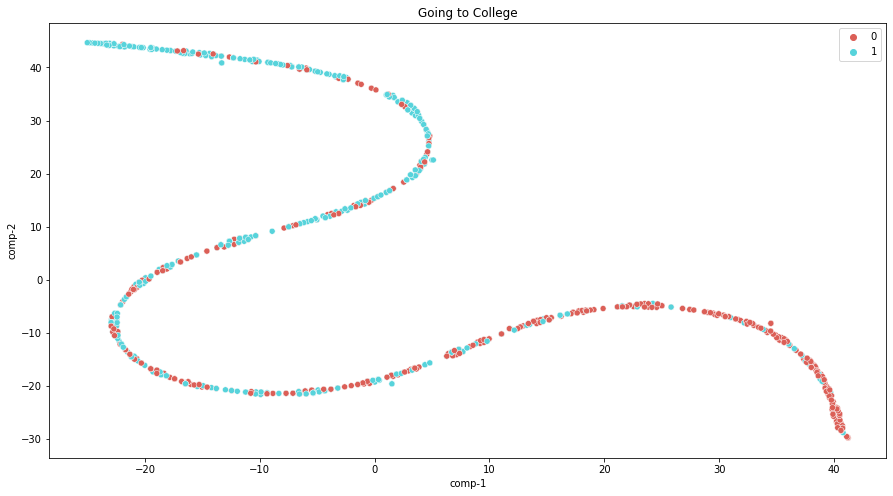

In [32]:
plt.figure(figsize=(15,8))
sn.scatterplot(x="comp-1", y="comp-2", hue=dfTSne.y.tolist(),
                palette=sn.color_palette("hls", 2),
                data=dfTSne, sizes=(20, 10)).set(title="Going to College")

### SỬ DỤNG THUẬT TOÁN GRID SEARCH ĐỂ TÌM HYPER PARAMETER

In [33]:
model_params = {
    'svm1':{
        'model':svm.SVC(),
        'params':{
            'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10],
            'gamma': ['scale', 'auto'],
            'kernel': ['rbf']
        }
    },
    'svm2':{
        'model':svm.SVC(),
        'params':{
            'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10],
            'kernel': ['linear']
        }
    },
    'svm3':{
        'model':svm.SVC(),
        'params':{
            'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10],
            'degree': [1,2,3,4,5,6],
            'gamma': ['scale', 'auto'],
            'kernel': ['poly']
        }
    },
    'svm4':{
        'model':svm.SVC(),
        'params':{
            'C': [0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10],
            'kernel': ['sigmoid']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,2,5,7,10,12, 15, 17,20, 22,25,30,40,50],
            'criterion': ['gini','entropy'],
            'max_depth': [5,10,15],
            'max_features': ['auto', 'sqrt', 'log2']
                }
        },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1,2,5,10,12,15,17,20,22,25,30,40,50,60,70,80,90,100,150,200]
            }
        },
    'knn':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors': [5,10,15,20,25,30,35,40],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
            }
        }
}

In [34]:
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    df = pd.DataFrame(clf.cv_results_)
    print(model_name)
    filepath = 'E:/Tài liệu đại học/Tri tue nhan tao va ung dung/AI Project/gridSearch/' + str(model_name) +'.xlsx'
    writer = pd.ExcelWriter(filepath, engine='xlsxwriter')
    df.to_excel(writer, sheet_name=model_name)
    writer.save()

## CHỌN MÔ HÌNH VÀ THỰC HIỆN DỰ ĐOÁN

In [35]:
# {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 25}

model = RandomForestClassifier(criterion='entropy', max_depth= 10, max_features='log2', n_estimators=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### ĐÁNH GIÁ MODEL

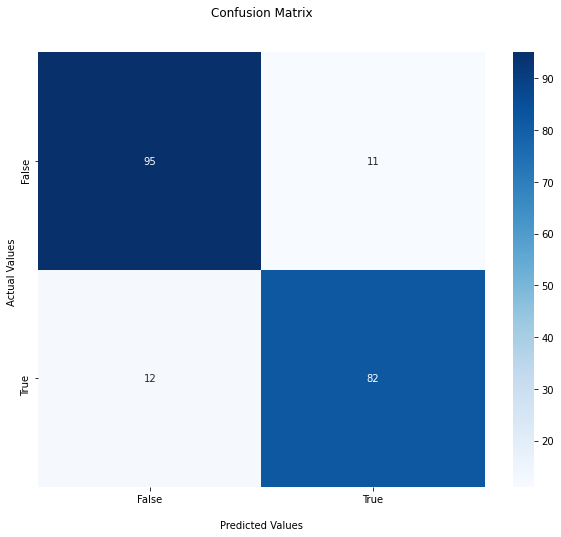

In [36]:
confu = confusion_matrix(y_test, y_pred , labels=[0,1])
plt.figure(figsize=(10,8))
ax = sn.heatmap(confu, annot=True, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       106
           1       0.88      0.87      0.88        94

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.89      0.88       200

